In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = np.random.uniform(-1,1,100)
Y = np.random.uniform(-1,1,100)
noise = np.random.normal(0,1,100)
Z = (2 * X) + (3 * Y) + 1 + noise
X_min = np.min(X)
X_max = np.max(X)
X_plane = np.linspace(X_min, X_max, 100)

Y_min = np.min(Y)
Y_max = np.max(Y)
Y_plane = np.linspace(Y_min, Y_max, 100)
X_plane,Y_plane = np.meshgrid(X_plane,Y_plane)

In [2]:
def problem_a(X,Y,Z):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.scatter(X, Y, Z, color = 'r')

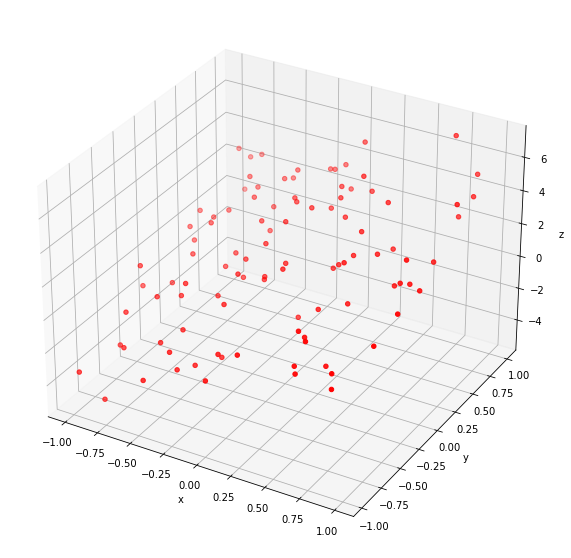

In [3]:
problem_a(X,Y,Z)

In [4]:
def problem_b(X,Y,Z):
    temp = np.c_[X, Y, np.ones(100)]
    theta = np.linalg.inv(temp.T@temp)@temp.T@Z
    print('theta0: ' + str(theta[0]))
    print('theta1: ' + str(theta[1]))
    print('theta2: ' + str(theta[2]))
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X, Y, Z, color = 'r')
    Z_plane = (theta[0]*X_plane) + (theta[1]*Y_plane) + (theta[2])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot_surface(X_plane, Y_plane, Z_plane, alpha=0.5)

theta0: 1.7748692471863194
theta1: 3.073623109527454
theta2: 1.0309267900546883


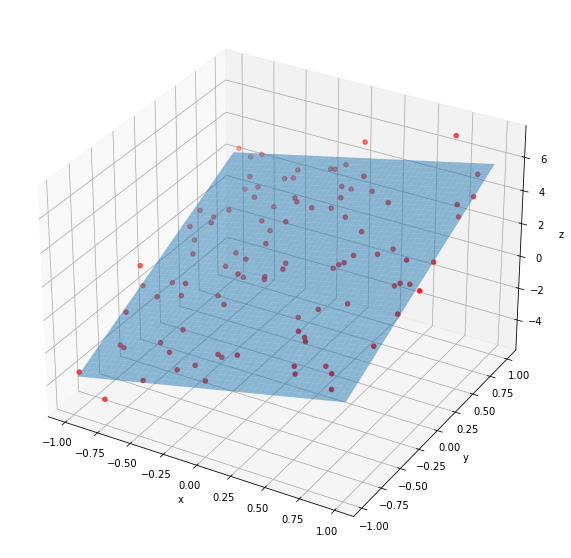

In [5]:
problem_b(X,Y,Z)

In [6]:
def gradient(cur_theta):
    temp = np.c_[X, Y, np.ones(100)]
    return temp.T@temp@cur_theta - temp.T@Z

def loss_function(theta):
    temp = np.c_[X, Y, np.ones(100)]
    return 1/2 * (np.linalg.norm((temp@theta - Z), 2) **2)

def train(learning_rate, iteration_num, pre_theta):
    cur_theta = pre_theta
    loss_values = []
    for i in range(iteration_num):
        cur_theta = cur_theta - (learning_rate * gradient(cur_theta))
        loss_values.append(loss_function(cur_theta))
    return loss_values, cur_theta

In [7]:
def problem_c():
    print('<theta by using a normal equation>')
    temp = np.c_[X, Y, np.ones(100)]
    theta = np.linalg.inv(temp.T@temp)@temp.T@Z
    loss_normal = loss_function(theta)
    print('theta0: '+ str(theta[0]) + ', theta1: '+ str(theta[1]) + ', theta2: '+ str(theta[2]))
    print('loss : ' + str(loss_normal))
    print('')
    
    print('<theta by using a gradient descent algorithm>')
    loss_gd = []
    learning_rates = [0.00005, 0.0001, 0.0002, 0.0004, 0.0008]
    for learning_rate in learning_rates:
        loss_values, result_theta = train(learning_rate, 500, np.array([0, 0, 0]))
        loss_gd.append(loss_values[-1])
        plt.plot(loss_values)
        print('learning rate: ' + str(learning_rate))
        print('theta0: '+ str(result_theta[0]) + ', theta1: '+ str(result_theta[1]) + ', theta2: '+ str(result_theta[2]))
        print('loss : ' + str(loss_values[-1]))
        print('')
    plt.xlabel('the number of iterations')
    plt.ylabel('loss values')
    
    if loss_normal < min(loss_gd):
        print('The solution by normal equation is closer than the solution by gradient descent')
    elif loss_normal > min(loss_gd):
        print('The solution by gradient descent is closer than the solution by normal equation')

<theta by using a normal equation>
theta0: 1.7748692471863194, theta1: 3.073623109527454, theta2: 1.0309267900546883
loss : 35.76454291060452

<theta by using a gradient descent algorithm>
learning rate: 5e-05
theta0: 0.9607512059980522, theta1: 1.7340335763659565, theta2: 1.0127968642287388
loss : 75.51657833075768

learning rate: 0.0001
theta0: 1.4202632074390908, theta1: 2.470306725027223, theta2: 1.0594529428905743
loss : 43.63023537564396

learning rate: 0.0002
theta0: 1.7089181895761467, theta1: 2.950233148568515, theta2: 1.038972206788239
loss : 36.078670022630966

learning rate: 0.0004
theta0: 1.7726005663138513, theta1: 3.068545475308318, theta2: 1.0313120703712908
loss : 35.76503842596501

learning rate: 0.0008
theta0: 1.7748665663105676, theta1: 3.0736151179008453, theta2: 1.0309275014163546
loss : 35.76454291174215

The solution by normal equation is closer than the solution by gradient descent


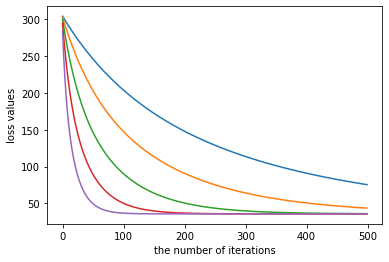

In [8]:
problem_c()

<h1>The solution by normal equation is closer than the solution by gradient descent, But the loss values of the two optimal solutions are very similar.</h1>

In [9]:
def problem_d():
    for i in range(10):
        random_theta = np.random.normal(0,1,3)
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(projection='3d')
        ax.scatter(X, Y, Z, color = 'r')
        Z_plane = (random_theta[0]*X_plane) + (random_theta[1]*Y_plane) + (random_theta[2])
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.plot_surface(X_plane, Y_plane, Z_plane, alpha=0.5)

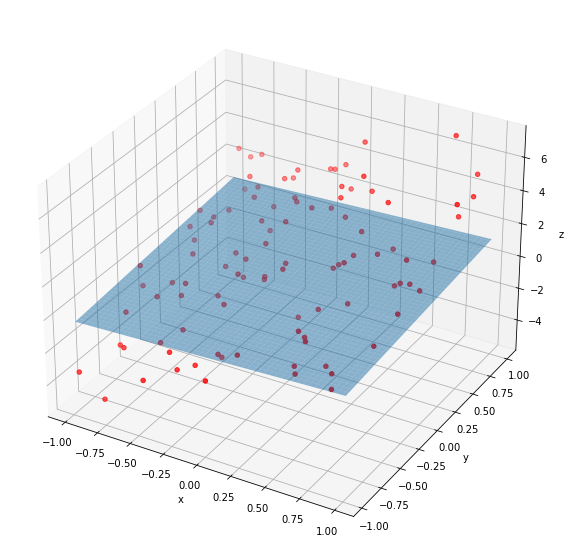

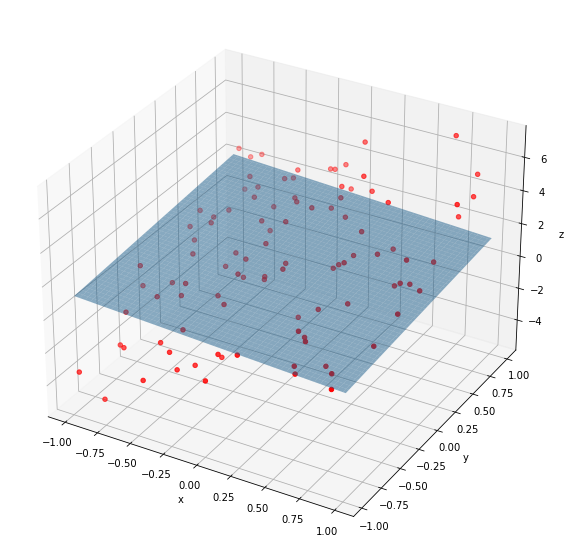

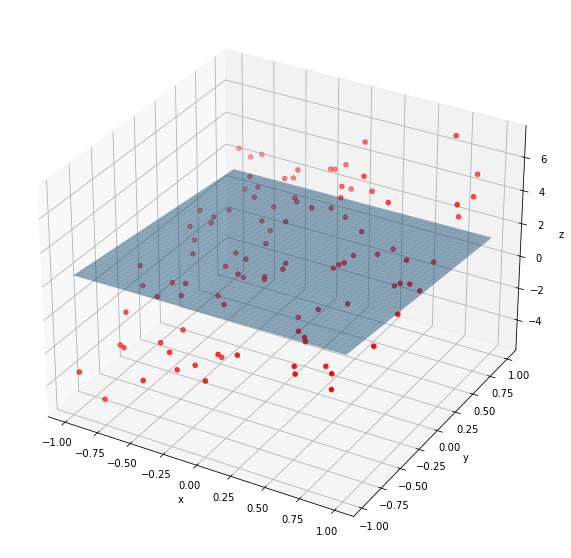

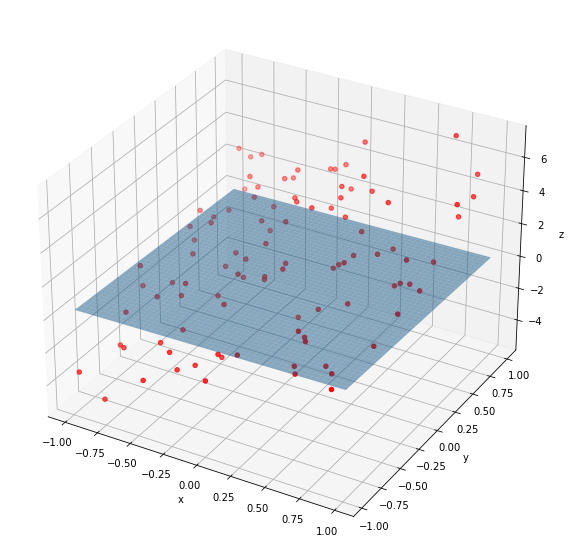

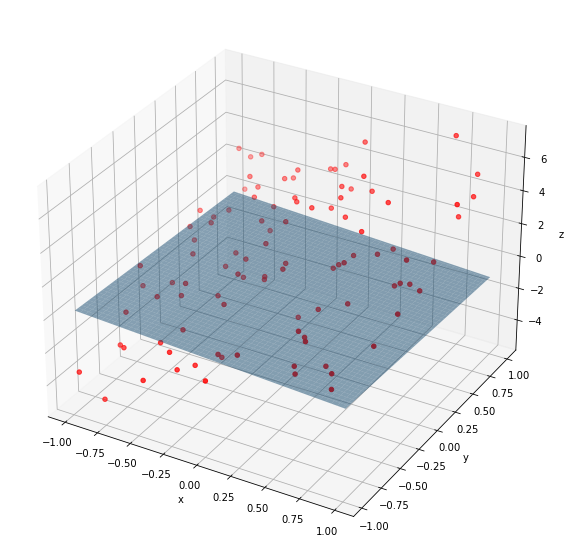

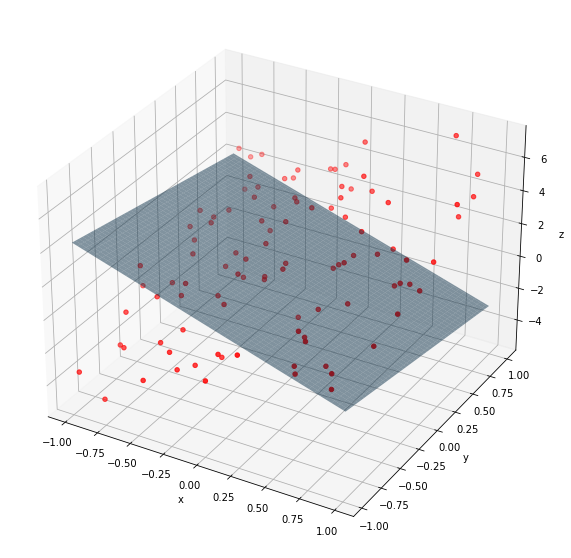

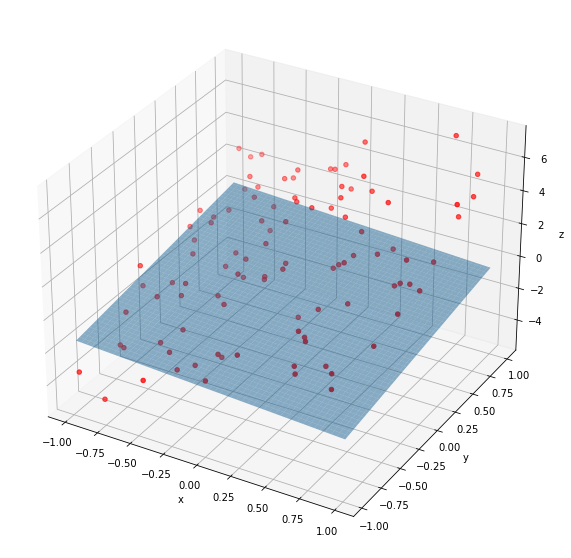

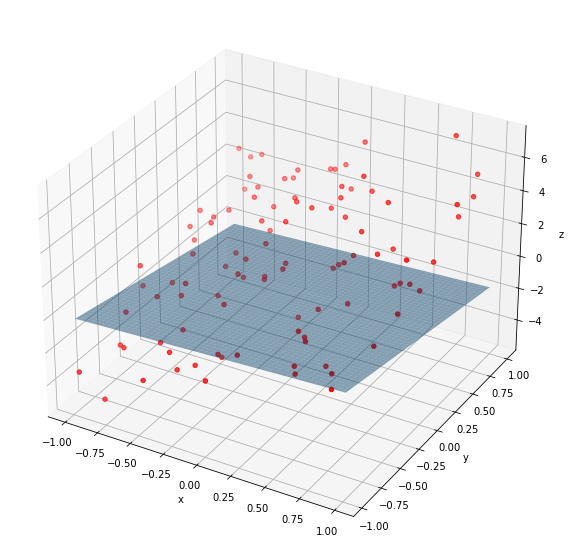

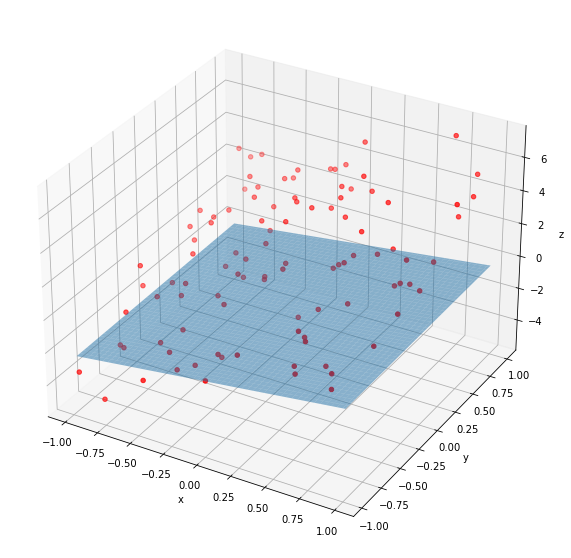

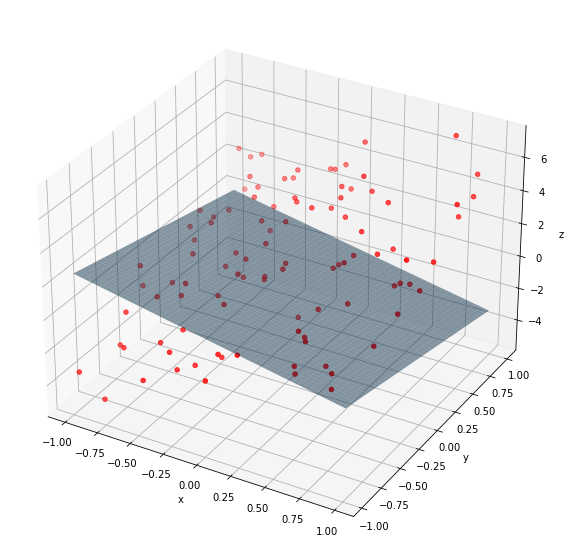

In [10]:
problem_d()

In [11]:
def regularized_gradient(cur_theta, lambda_val):
    temp = np.c_[X, Y, np.ones(100)]
    return temp.T@temp@cur_theta - temp.T@Z

def regularized_loss_function(theta,lambda_val):
    temp = np.c_[X, Y, np.ones(100)]
    return 1/2 * (np.linalg.norm((temp@theta - Z), 2) **2) + ((theta@theta) * lambda_val)

def regularized_train(learning_rate, iteration_num, pre_theta, lambda_val):
    cur_theta = pre_theta
    loss_values = []
    for i in range(iteration_num):
        cur_theta = cur_theta - (learning_rate * regularized_gradient(cur_theta, lambda_val))
        loss_values.append(regularized_loss_function(cur_theta, lambda_val))
    return loss_values, cur_theta

In [12]:
def using_closed_form_solution(lambda_val):
    temp = np.c_[X, Y, np.ones(100)]
    theta = np.linalg.inv( temp.T@temp - (lambda_val*np.identity(3)) )@temp.T@Z
    print('theta0: '+ str(theta[0]) + ', theta1: '+ str(theta[1]) + ', theta2: '+ str(theta[2]))
    loss_normal = regularized_loss_function(theta,lambda_val)
    print('loss : ' + str(loss_normal))
    print('')
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X, Y, Z, color = 'r')
    Z_plane = (theta[0]*X_plane) + (theta[1]*Y_plane) + (theta[2])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot_surface(X_plane, Y_plane, Z_plane, alpha=0.5)

In [13]:
def problem_e_closed_form():
    lambda_vals = [0.005, 0.006, 0.007, 0.008, 0.009]
    print('<theta by using a closed form>')
    for lambda_val in lambda_vals:
        print('lambda: ' + str(lambda_val))
        using_closed_form_solution(lambda_val)
    

<theta by using a closed form>
lambda: 0.005
theta0: 1.7751472442492688, theta1: 3.0740938998969214, theta2: 1.030958684806257
loss : 35.83286822892838

lambda: 0.006
theta0: 1.775202853771459, theta1: 3.0741880756830224, theta2: 1.0309650633731609
loss : 35.846539214826265

lambda: 0.007
theta0: 1.7752584666642235, theta1: 3.074282257374496, theta2: 1.0309714418121925
loss : 35.86021217547402

lambda: 0.008
theta0: 1.775314082927867, theta1: 3.0743764449719038, theta2: 1.030977820123324
loss : 35.8738871111598

lambda: 0.009
theta0: 1.7753697025626929, theta1: 3.0744706384758054, theta2: 1.0309841983065249
loss : 35.88756402217189



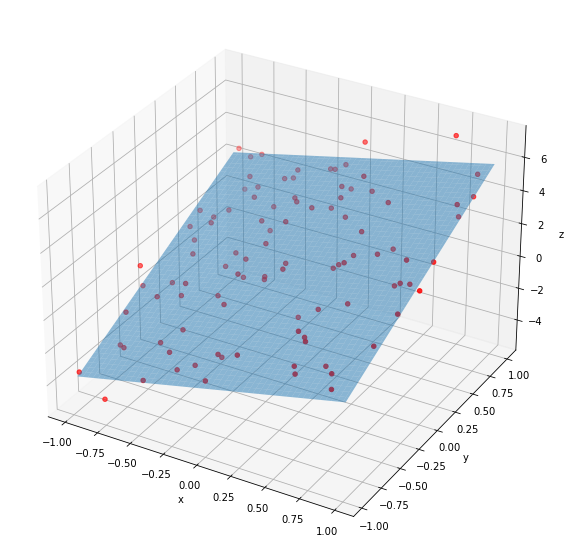

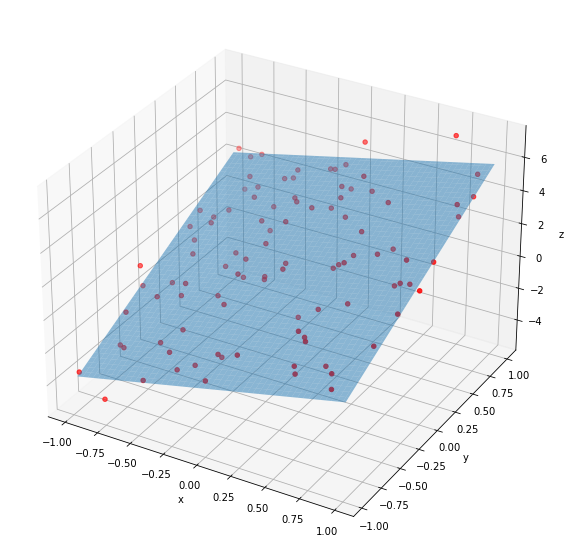

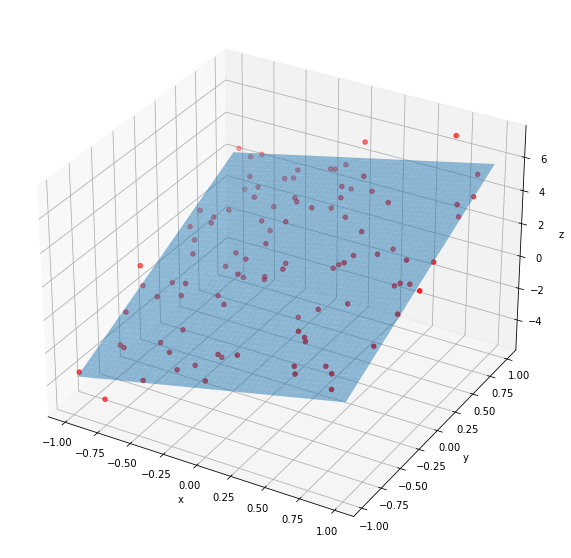

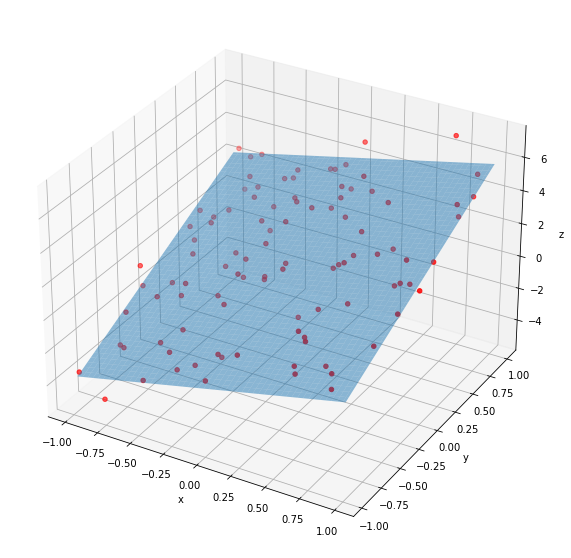

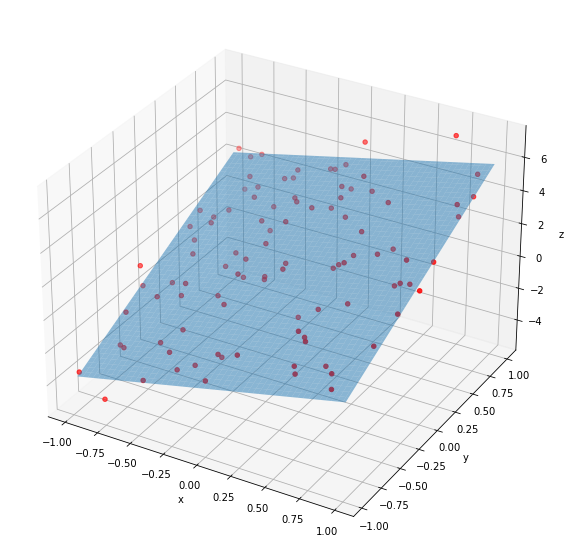

In [14]:
problem_e_closed_form()

In [15]:
def problem_e_gradient_descent():
    lambda_vals = [0.005, 0.006, 0.007, 0.008, 0.009]
    print('<theta by using a gradient descent algorithm>')
    for lambda_val in lambda_vals:
        loss_values, result_theta = regularized_train(0.0008, 500, np.array([0, 0, 0]), lambda_val)
        print('lambda: ' + str(lambda_val))
        print('theta0: '+ str(result_theta[0]) + ', theta1: '+ str(result_theta[1]) + ', theta2: '+ str(result_theta[2]))
        print('loss : ' + str(loss_values[-1]))
        print('')
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(projection='3d')
        ax.scatter(X, Y, Z, color = 'r')
        Z_plane = (result_theta[0]*X_plane) + (result_theta[1]*Y_plane) + (result_theta[2])
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.plot_surface(X_plane, Y_plane, Z_plane, alpha=0.5)

<theta by using a gradient descent algorithm>
lambda: 0.005
theta0: 1.7748665663105676, theta1: 3.0736151179008453, theta2: 1.0309275014163546
loss : 35.83284327541401

lambda: 0.006
theta0: 1.7748665663105676, theta1: 3.0736151179008453, theta2: 1.0309275014163546
loss : 35.84650334814838

lambda: 0.007
theta0: 1.7748665663105676, theta1: 3.0736151179008453, theta2: 1.0309275014163546
loss : 35.860163420882756

lambda: 0.008
theta0: 1.7748665663105676, theta1: 3.0736151179008453, theta2: 1.0309275014163546
loss : 35.873823493617124

lambda: 0.009
theta0: 1.7748665663105676, theta1: 3.0736151179008453, theta2: 1.0309275014163546
loss : 35.8874835663515



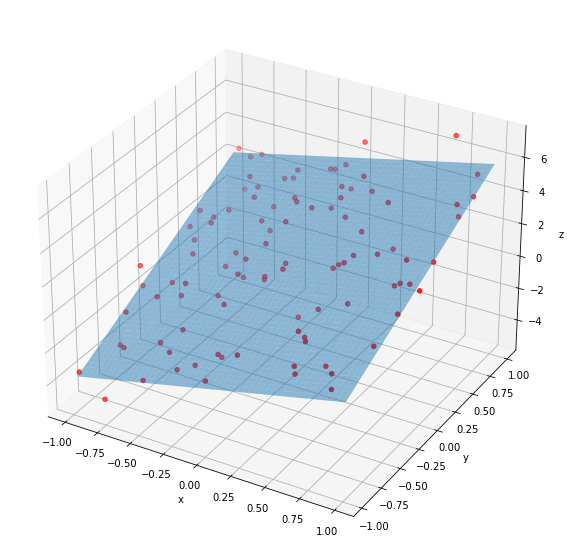

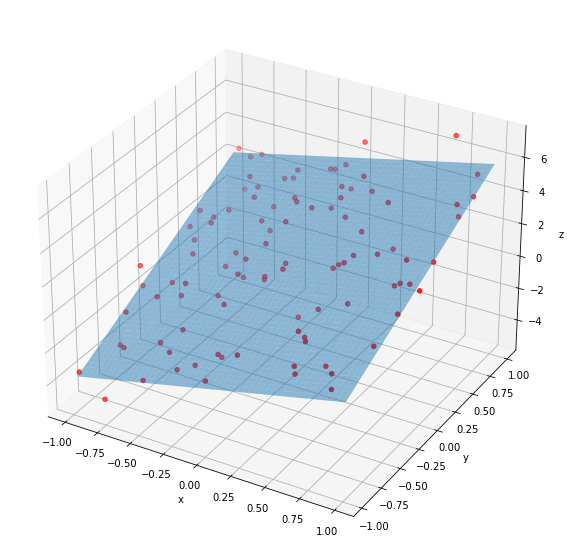

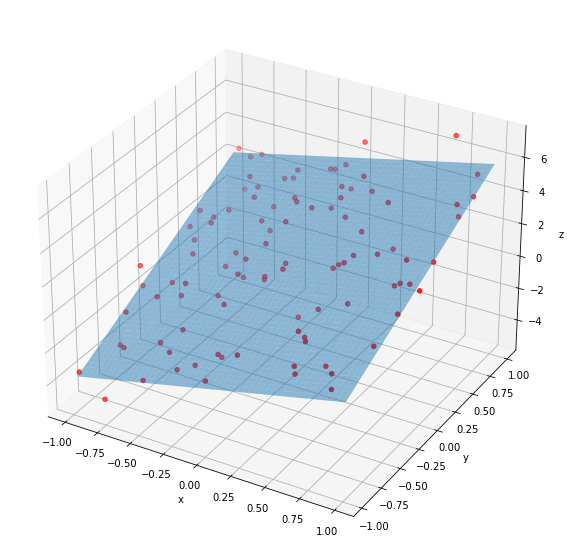

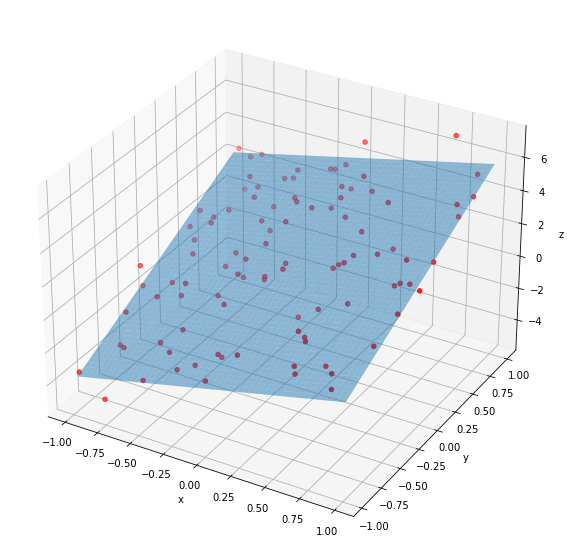

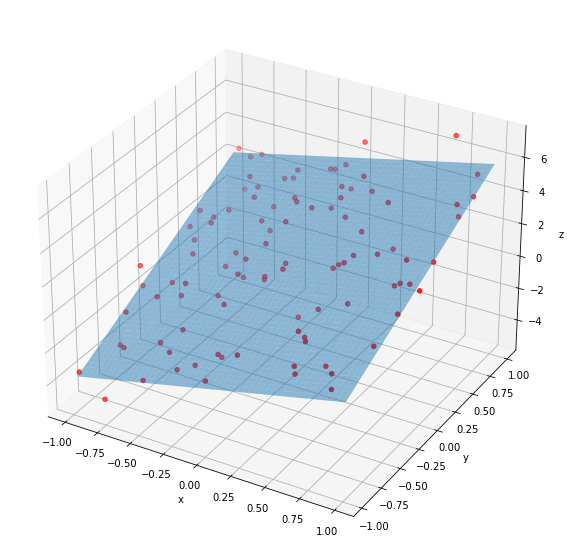

In [16]:
problem_e_gradient_descent()

<h1>The loss values of the two optimal solutions are very similar.</h1>